# 1 数据处理与清洗

## 1.1 加载数据

In [1]:
import chardet

with open("datasets/dataset_ubicomp2013_tips.txt", "rb") as f:
    result = chardet.detect(f.read())
    print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [2]:
import pandas as pd

# 加载签到数据
checkins = pd.read_csv("datasets/dataset_ubicomp2013_checkins.txt", sep="\t", header=None, names=["user_id", "venue_id"], encoding="ISO-8859-1")
# 加载评论数据
tips = pd.read_csv("datasets/dataset_ubicomp2013_tips.txt", sep="\t", header=None, names=["user_id", "venue_id", "tip_text"], encoding="ISO-8859-1")
# 加载标签数据
tags = pd.read_csv("datasets/dataset_ubicomp2013_tags.txt", sep="\t", header=None, names=["venue_id", "tags"], encoding="ISO-8859-1")

## 1.2 数据检查

In [ ]:
# 检查缺失值
print("签到数据缺失值统计：")
print(checkins.isnull().sum())

print("\n评论数据缺失值统计：")
print(tips.isnull().sum())

print("\n标签数据缺失值统计：")
print(tags.isnull().sum())

In [ ]:
# 检查重复值
print("\n签到数据重复值数量：", checkins.duplicated().sum())
print("评论数据重复值数量：", tips.duplicated().sum())
print("标签数据重复值数量：", tags.duplicated().sum())

## 1.3 数据清洗

In [5]:
# 处理缺失值
# 对于标签数据中的缺失值，用空字符串填充
tags["tags"] = tags["tags"].fillna("")

## 1.4 数据类型转换

In [6]:
# 确保 user_id 和 venue_id 为整数类型
checkins["user_id"] = checkins["user_id"].astype(int)
checkins["venue_id"] = checkins["venue_id"].astype(int)

tips["user_id"] = tips["user_id"].astype(int)
tips["venue_id"] = tips["venue_id"].astype(int)

tags["venue_id"] = tags["venue_id"].astype(int)

In [ ]:
# 打印清洗后的数据集信息
print("\n清洗后的签到数据：")
print(checkins.info())

print("\n清洗后的评论数据：")
print(tips.info())

print("\n清洗后的标签数据：")
print(tags.info())

# 2 数据可视化

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示中文和负号
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号

## 2.1 用户行为分析

### 2.1.1 用户签到分布

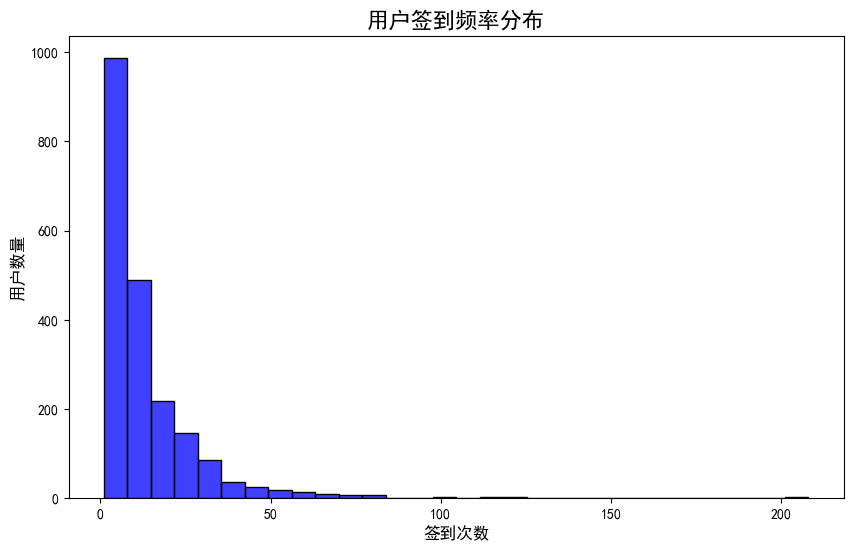

In [9]:
# 统计每个用户的签到次数
user_checkin_counts = checkins['user_id'].value_counts()

# 绘制签到频率分布
plt.figure(figsize=(10, 6))
sns.histplot(user_checkin_counts, bins=30, kde=False, color='blue')
plt.title("用户签到频率分布", fontsize=16)
plt.xlabel("签到次数", fontsize=12)
plt.ylabel("用户数量", fontsize=12)
plt.show()

### 2.1.2 用户签到的热门餐厅

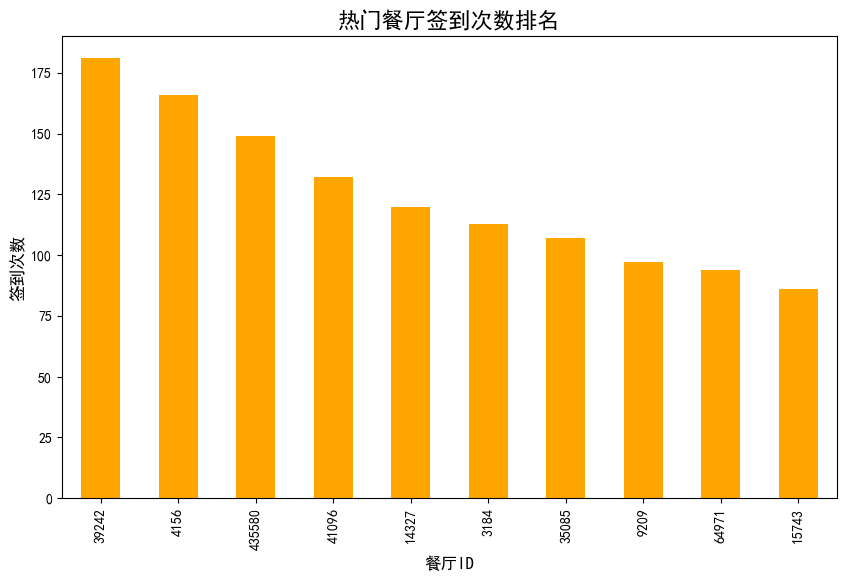

In [10]:
# 统计每个餐厅的签到次数
venue_checkin_counts = checkins['venue_id'].value_counts()

# 绘制餐厅签到次数排名
plt.figure(figsize=(10, 6))
venue_checkin_counts.head(10).plot(kind='bar', color='orange')
plt.title("热门餐厅签到次数排名", fontsize=16)
plt.xlabel("餐厅ID", fontsize=12)
plt.ylabel("签到次数", fontsize=12)
plt.show()

## 2.2 餐厅特征分析

### 2.2.1 餐厅类型分布

C:\Users\avawa\AppData\Local\Temp\ipykernel_3460\3026294379.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tag_counts_df.head(10), x='tag', y='count', palette='viridis')


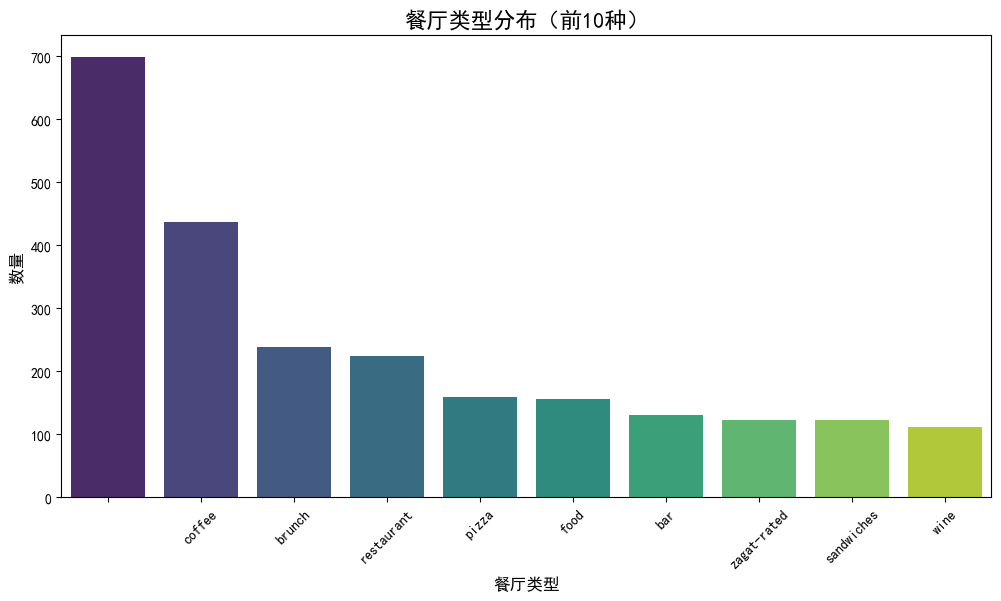

In [9]:
from collections import Counter

# 分割标签并统计每种类型的数量
tags['tags'] = tags['tags'].fillna("")  # 处理空标签
all_tags = tags['tags'].str.split(",").sum()  # 将所有标签展开为列表
tag_counts = Counter(all_tags)  # 统计每种标签的数量

# 转换为 DataFrame
tag_counts_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count']).sort_values(by='count', ascending=False)

# 绘制餐厅类型分布
plt.figure(figsize=(12, 6))
sns.barplot(data=tag_counts_df.head(10), x='tag', y='count', palette='viridis')
plt.title("餐厅类型分布（前10种）", fontsize=16)
plt.xlabel("餐厅类型", fontsize=12)
plt.ylabel("数量", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 2.2.2 餐厅签到热度

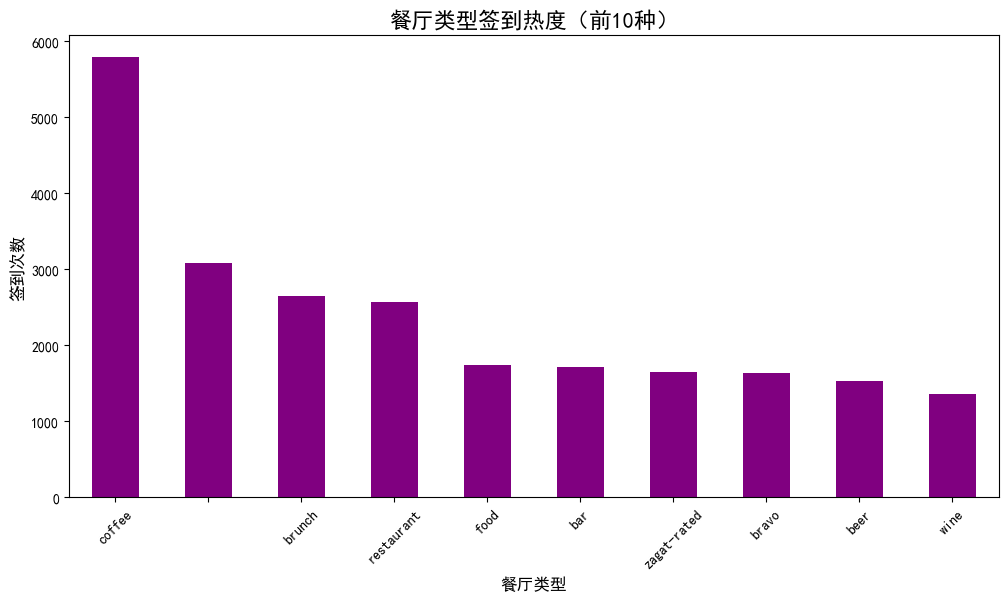

In [12]:
# 合并签到数据和标签数据
checkins_with_tags = pd.merge(checkins, tags, on='venue_id', how='left')

# 统计每种餐厅类型的签到次数
tag_checkin_counts = checkins_with_tags['tags'].str.split(",").explode().value_counts()

# 绘制餐厅类型签到热度
plt.figure(figsize=(12, 6))
tag_checkin_counts.head(10).plot(kind='bar', color='purple')
plt.title("餐厅类型签到热度（前10种）", fontsize=16)
plt.xlabel("餐厅类型", fontsize=12)
plt.ylabel("签到次数", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 2.3 评论数据分析

### 2.3.1 评论长度分布

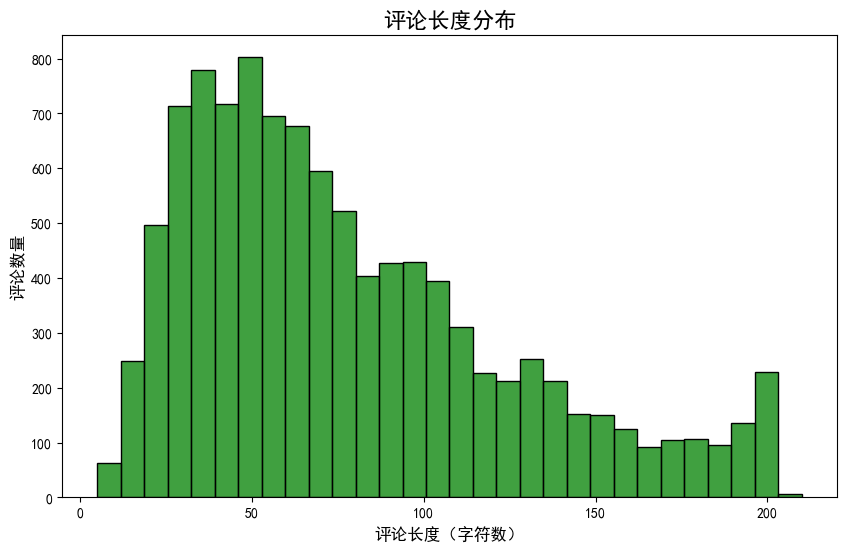

In [13]:
# 计算评论长度
tips['tip_length'] = tips['tip_text'].apply(len)

# 绘制评论长度分布
plt.figure(figsize=(10, 6))
sns.histplot(tips['tip_length'], bins=30, kde=False, color='green')
plt.title("评论长度分布", fontsize=16)
plt.xlabel("评论长度（字符数）", fontsize=12)
plt.ylabel("评论数量", fontsize=12)
plt.show()

### 2.3.2 评论关键词分析

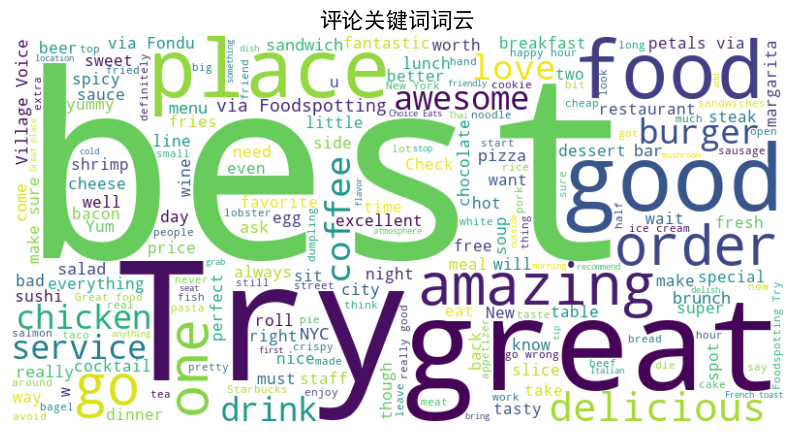

In [10]:
from wordcloud import WordCloud

# 将所有评论合并为一个字符串
all_tips = " ".join(tips['tip_text'])

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tips)

# 显示词云
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("评论关键词词云", fontsize=16)
plt.show()

# 3 特征工程

## 3.1 用户特征

In [11]:
# 用户签到次数：统计每个用户的签到总次数，作为用户活跃度的衡量指标
user_checkin_counts = checkins['user_id'].value_counts().reset_index()
user_checkin_counts.columns = ['user_id', 'total_checkins']

# 用户签到的餐厅数量：衡量用户探索多样性
user_venue_diversity = checkins.groupby('user_id')['venue_id'].nunique().reset_index()
user_venue_diversity.columns = ['user_id', 'venue_count']

# 用户忠诚度指标：平均每个餐厅的签到次数
user_loyalty = user_checkin_counts['total_checkins'] / user_venue_diversity['venue_count']
user_loyalty = pd.DataFrame({'user_id': user_checkin_counts['user_id'], 'loyalty_score': user_loyalty})

# 用户评论数量：用户参与度指标
user_tip_counts = tips['user_id'].value_counts().reset_index()
user_tip_counts.columns = ['user_id', 'tip_count']

# 用户评论的平均长度：反映用户对餐厅的关注程度
tips['tip_length'] = tips['tip_text'].apply(len)
user_tip_length = tips.groupby('user_id')['tip_length'].mean().reset_index(name='avg_tip_length')

# 用户评论情感得分：反映用户的评论倾向
from textblob import TextBlob
tips['sentiment'] = tips['tip_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
user_sentiment = tips.groupby('user_id')['sentiment'].mean().reset_index(name='avg_sentiment')

In [12]:
# 合并用户特征
user_features = user_checkin_counts.merge(user_venue_diversity, on='user_id', how='left')
user_features = user_features.merge(user_loyalty, on='user_id', how='left')
user_features = user_features.merge(user_tip_counts, on='user_id', how='left')
user_features = user_features.merge(user_tip_length, on='user_id', how='left')
user_features = user_features.merge(user_sentiment, on='user_id', how='left')

# 填充缺失值
user_features = user_features.fillna(0)

## 3.2 餐厅特征

In [13]:
# 餐厅签到次数：衡量餐厅整体受欢迎程度
venue_checkin_counts = checkins['venue_id'].value_counts().reset_index()
venue_checkin_counts.columns = ['venue_id', 'total_checkins']

# 餐厅的独立访客数量：衡量餐厅受欢迎度的广度
venue_visitor_counts = checkins.groupby('venue_id')['user_id'].nunique().reset_index()
venue_visitor_counts.columns = ['venue_id', 'unique_visitors']

# 餐厅吸引力指标：平均每个用户的签到次数
venue_attraction = venue_checkin_counts['total_checkins'] / venue_visitor_counts['unique_visitors']
venue_attraction = pd.DataFrame({'venue_id': venue_checkin_counts['venue_id'], 'attraction_score': venue_attraction})

# 餐厅评论数量：衡量用户对餐厅的评价参与度
venue_tip_counts = tips['venue_id'].value_counts().reset_index()
venue_tip_counts.columns = ['venue_id', 'tip_count']

# 餐厅评论平均情感得分：衡量餐厅整体评价
venue_sentiment = tips.groupby('venue_id')['sentiment'].mean().reset_index(name='avg_sentiment')

In [14]:
# 餐厅标签处理：提取餐厅的主要特征标签
venue_tags = tags.copy()
venue_tags['tag_list'] = venue_tags['tags'].apply(lambda x: str(x).split(',') if isinstance(x, str) else [])

# 提取最常见的标签作为特征
from collections import Counter
all_tags = []
for tag_list in venue_tags['tag_list']:
    all_tags.extend(tag_list)
    
top_tags = [tag for tag, _ in Counter(all_tags).most_common(30) if tag.strip()]

# 为每个标签创建二进制特征
for tag in top_tags:
    venue_tags[f'tag_{tag}'] = venue_tags['tag_list'].apply(lambda x: 1 if tag in x else 0)

# 移除原始tag_list列
venue_tag_features = venue_tags.drop(['tags', 'tag_list'], axis=1)

In [15]:
# 合并餐厅特征
venue_features = venue_checkin_counts.merge(venue_visitor_counts, on='venue_id', how='left')
venue_features = venue_features.merge(venue_attraction, on='venue_id', how='left')
venue_features = venue_features.merge(venue_tip_counts, on='venue_id', how='left')
venue_features = venue_features.merge(venue_sentiment, on='venue_id', how='left')
venue_features = venue_features.merge(venue_tag_features, on='venue_id', how='left')

# 填充缺失值
venue_features = venue_features.fillna(0)

## 3.3 用户与餐厅交互特征

In [16]:
# 用户对餐厅的签到次数：统计每个用户对每个餐厅的签到次数，作为用户与餐厅交互的强度特征
user_venue_checkins = checkins.groupby(['user_id', 'venue_id']).size().reset_index(name='checkin_count')

# 用户对餐厅的评论次数
tip_counts = tips.groupby(['user_id', 'venue_id']).size().reset_index(name='tip_count')

# 用户对餐厅的情感评分
user_venue_sentiment = tips.groupby(['user_id', 'venue_id'])['sentiment'].mean().reset_index(name='avg_sentiment')

In [17]:
# 合并交互特征
interaction_features = user_venue_checkins.copy()
interaction_features = interaction_features.merge(tip_counts, on=['user_id', 'venue_id'], how='left')
interaction_features = interaction_features.merge(user_venue_sentiment, on=['user_id', 'venue_id'], how='left')

# 填充缺失值
interaction_features['tip_count'] = interaction_features['tip_count'].fillna(0)
interaction_features['avg_sentiment'] = interaction_features['avg_sentiment'].fillna(0)

In [18]:
# 创建交互强度分类特征
def categorize_checkin(count):
    if count == 1:
        return 'one_time'
    elif count <= 3:
        return 'occasional'
    elif count <= 10:
        return 'regular'
    else:
        return 'frequent'

interaction_features['checkin_category'] = interaction_features['checkin_count'].apply(categorize_checkin)

# 创建交互得分 - 结合签到次数和情感得分
interaction_features['interaction_score'] = interaction_features['checkin_count'] * (interaction_features['avg_sentiment'] + 1)

## 3.4 特征分析与可视化

### 3.4.1 关于用户

签到次数统计：
count    13472.000000
mean         2.015217
std          3.276076
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max        149.000000
Name: checkin_count, dtype: float64


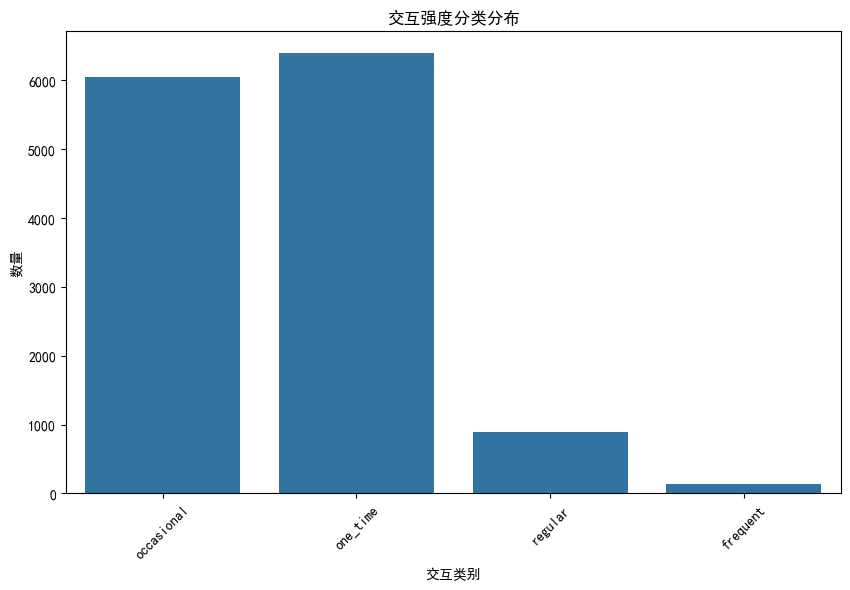

In [19]:
# 签到次数分布统计
print("签到次数统计：")
print(interaction_features['checkin_count'].describe())

# 可视化交互强度分类特征
plt.figure(figsize=(10, 6))
sns.countplot(data=interaction_features, x='checkin_category')
plt.title('交互强度分类分布')
plt.xlabel('交互类别')
plt.ylabel('数量')
plt.xticks(rotation=45)
plt.show()

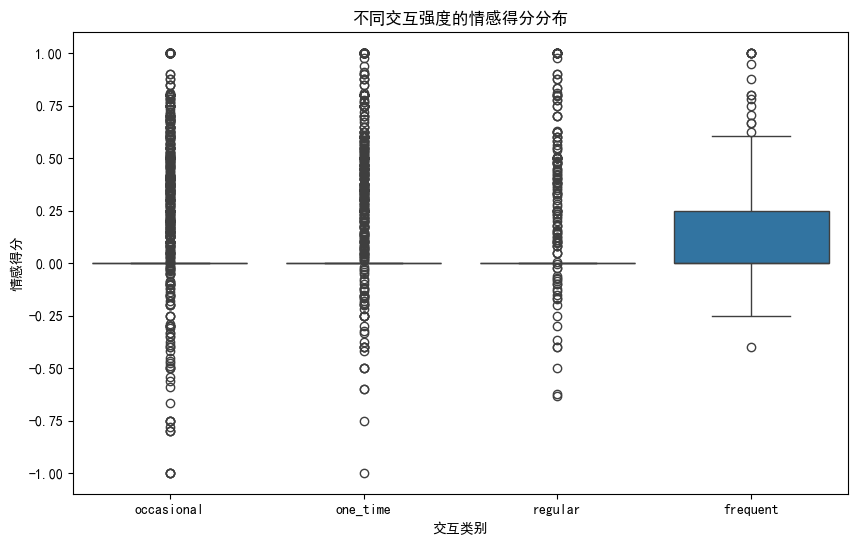

In [20]:
# 探索签到次数与评论情感的关系
plt.figure(figsize=(10, 6))
sns.boxplot(data=interaction_features, x='checkin_category', y='avg_sentiment')
plt.title('不同交互强度的情感得分分布')
plt.xlabel('交互类别')
plt.ylabel('情感得分')
plt.show()

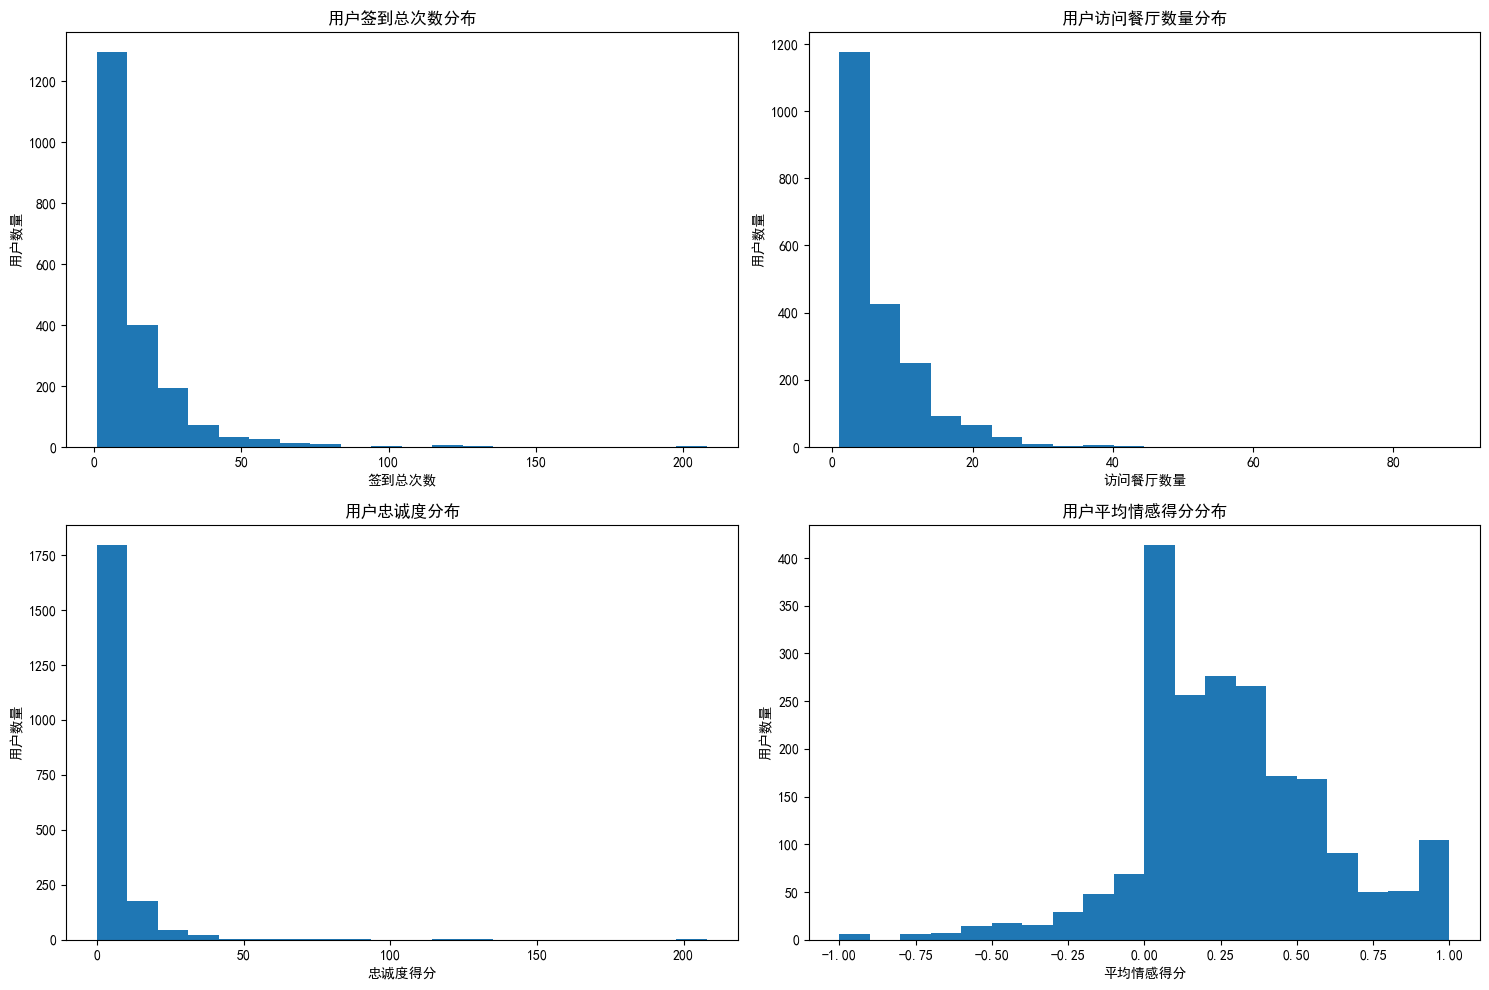

In [29]:
# 用户特征分布
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(user_features['total_checkins'], bins=20)
plt.title('用户签到总次数分布')
plt.xlabel('签到总次数')
plt.ylabel('用户数量')

plt.subplot(2, 2, 2)
plt.hist(user_features['venue_count'], bins=20)
plt.title('用户访问餐厅数量分布')
plt.xlabel('访问餐厅数量')
plt.ylabel('用户数量')

plt.subplot(2, 2, 3)
plt.hist(user_features['loyalty_score'], bins=20)
plt.title('用户忠诚度分布')
plt.xlabel('忠诚度得分')
plt.ylabel('用户数量')

plt.subplot(2, 2, 4)
plt.hist(user_features['avg_sentiment'], bins=20)
plt.title('用户平均情感得分分布')
plt.xlabel('平均情感得分')
plt.ylabel('用户数量')

plt.tight_layout()
plt.show()

### 3.4.2 关于餐厅

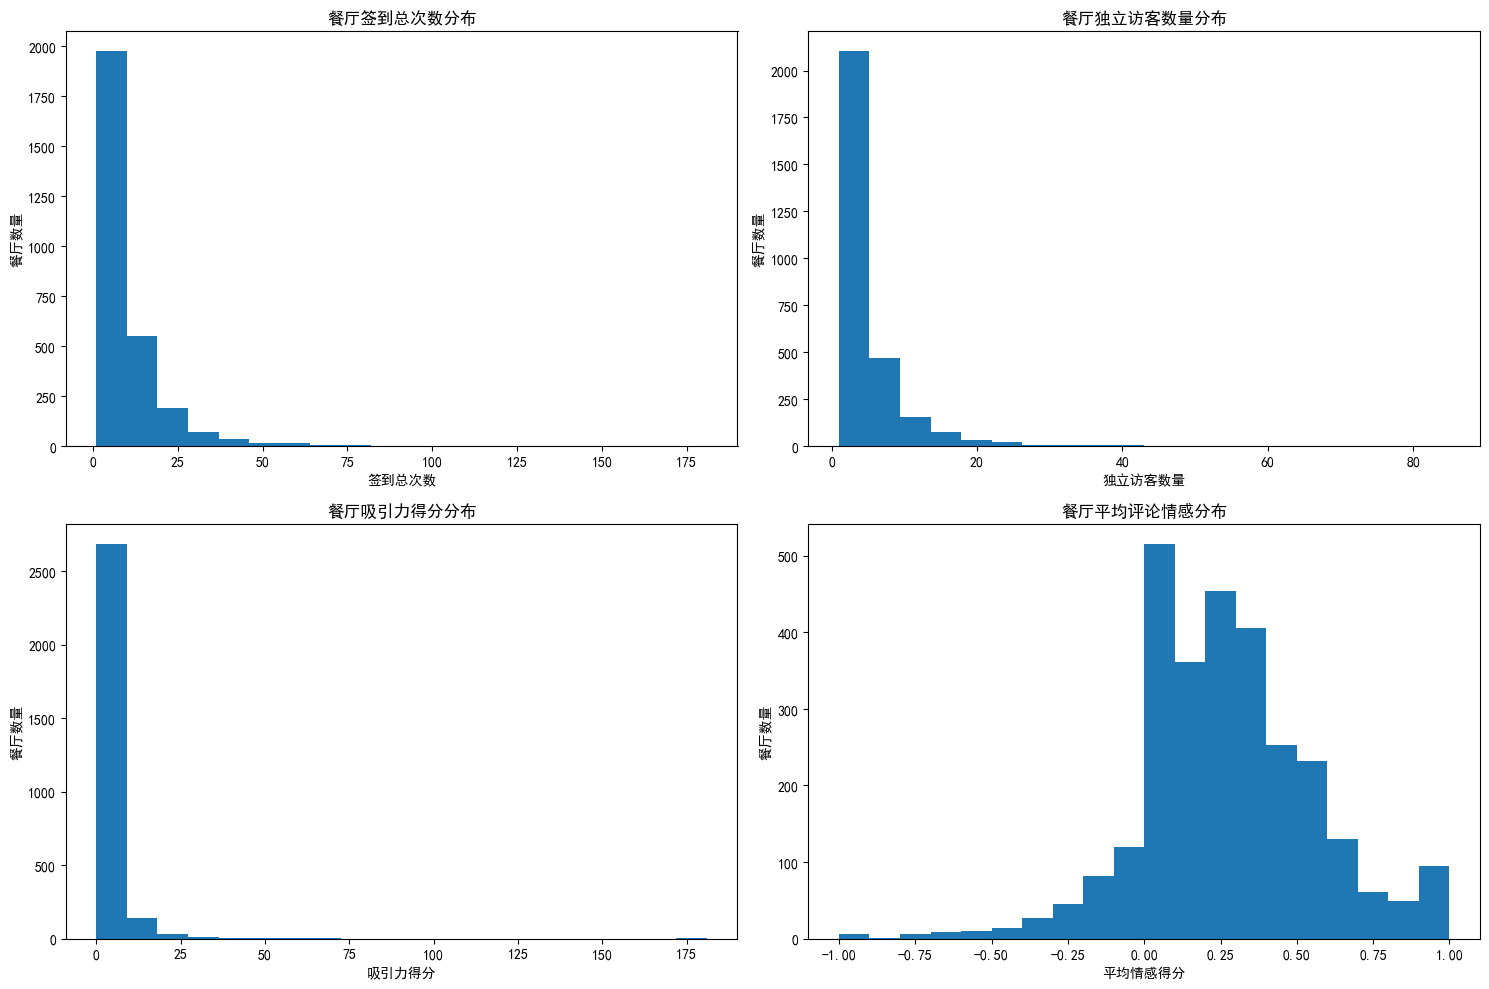

In [30]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(venue_features['total_checkins'], bins=20)
plt.title('餐厅签到总次数分布')
plt.xlabel('签到总次数')
plt.ylabel('餐厅数量')

plt.subplot(2, 2, 2)
plt.hist(venue_features['unique_visitors'], bins=20)
plt.title('餐厅独立访客数量分布')
plt.xlabel('独立访客数量')
plt.ylabel('餐厅数量')

plt.subplot(2, 2, 3)
plt.hist(venue_features['attraction_score'], bins=20)
plt.title('餐厅吸引力得分分布')
plt.xlabel('吸引力得分')
plt.ylabel('餐厅数量')

plt.subplot(2, 2, 4)
plt.hist(venue_features['avg_sentiment'], bins=20)
plt.title('餐厅平均评论情感分布')
plt.xlabel('平均情感得分')
plt.ylabel('餐厅数量')

plt.tight_layout()
plt.show()

## 3.5 保存处理后特征

In [21]:
# 保存用户特征
user_features.to_csv('data/user_features.csv', index=False)
print(f"保存用户特征: {user_features.shape[0]}行 x {user_features.shape[1]}列")

# 保存餐厅特征
venue_features.to_csv('data/venue_features.csv', index=False)
print(f"保存餐厅特征: {venue_features.shape[0]}行 x {venue_features.shape[1]}列")

# 保存交互特征
interaction_features.to_csv('data/interaction_features.csv', index=False)
print(f"保存交互特征: {interaction_features.shape[0]}行 x {interaction_features.shape[1]}列")

保存用户特征: 2060行 x 7列
保存餐厅特征: 2876行 x 35列
保存交互特征: 13472行 x 7列


# 4 推荐系统模型

## 4.1 协同过滤模型

In [22]:
from implicit.als import AlternatingLeastSquares
from sklearn.preprocessing import normalize
import scipy.sparse as sparse
import numpy as np

c:\Users\avawa\.conda\envs\mixrec\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
def build_improved_interaction_matrix(df, user_col, item_col, rating_col):
    """
    构建优化的用户-物品交互矩阵
    """
    # 复制数据以避免修改原始数据
    df_copy = df.copy()
    
    # 对签到次数进行对数变换，减小高频用户的影响
    df_copy['log_rating'] = np.log1p(df_copy[rating_col])
    
    # 用户和物品的索引映射
    user_ids = df_copy[user_col].unique()
    venue_ids = df_copy[item_col].unique()
    
    user_map = {user_id: idx for idx, user_id in enumerate(user_ids)}
    venue_map = {venue_id: idx for idx, venue_id in enumerate(venue_ids)}
    
    user_index_to_id = {idx: user_id for user_id, idx in user_map.items()}
    venue_index_to_id = {idx: venue_id for venue_id, idx in venue_map.items()}
    
    # 构建稀疏矩阵
    user_indices = [user_map[user] for user in df_copy[user_col]]
    venue_indices = [venue_map[venue] for venue in df_copy[item_col]]
    interaction_values = df_copy['log_rating'].values
    
    shape = (len(user_ids), len(venue_ids))
    interaction_matrix = sparse.csr_matrix((interaction_values, 
                                           (user_indices, venue_indices)), 
                                           shape=shape)
    
    # 行归一化，使得每个用户的交互水平相似
    # 这有助于减少活跃用户对模型的过度影响
    interaction_matrix_normalized = normalize(interaction_matrix, norm='l2', axis=1)
    
    return interaction_matrix_normalized, user_map, venue_map, user_index_to_id, venue_index_to_id

In [89]:
def train_improved_als_model(interaction_matrix, factors=100, regularization=0.01, 
                            iterations=50, alpha=15, confidence_scaling='log'):
    """
    训练改进的ALS模型
    
    参数:
    - factors: 潜在因子数量
    - regularization: 正则化系数
    - iterations: 迭代次数
    - alpha: 置信度因子，表示对观察到的交互的信心
    - confidence_scaling: 置信度缩放方式，'log'或'linear'
    """
    import torch
    import time
    from implicit.als import AlternatingLeastSquares
    
    # 检查是否有可用的GPU并打印详细信息
    gpu_available = torch.cuda.is_available()
    
    print("\n===== GPU 状态 =====")
    print(f"PyTorch版本: {torch.__version__}")
    print(f"CUDA是否可用: {gpu_available}")
    
    if gpu_available:
        print(f"CUDA版本: {torch.version.cuda}")
        print(f"GPU型号: {torch.cuda.get_device_name(0)}")
        print(f"GPU显存总量: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")
        print(f"当前显存使用: {torch.cuda.memory_allocated(0) / 1024**3:.1f} GB")
        use_gpu = True
    else:
        print("GPU不可用，使用CPU")
        use_gpu = False
    print("===================\n")
    
    print(f"因子数: {factors}, 正则化: {regularization}, 迭代次数: {iterations}")
    print(f"置信因子alpha: {alpha}, 置信缩放: {confidence_scaling}")
    
    # 创建模型
    model = AlternatingLeastSquares(factors=factors, 
                                   regularization=regularization,
                                   iterations=iterations,
                                   calculate_training_loss=True,
                                   use_gpu=use_gpu,
                                   use_native=True,
                                   use_cg=True,
                                   alpha=alpha)
    
    # 记录开始时间
    start_time = time.time()
    
    # 如果使用log缩放，无需额外处理，默认已经在构建矩阵时处理
    # 如果使用线性缩放，可以按需调整置信度
    if confidence_scaling == 'linear':
        # 线性缩放 - 基于交互强度线性增加置信度
        confidence = (interaction_matrix * alpha).astype('double')
        model.fit(confidence)
    else:
        # 默认处理方式
        model.fit(interaction_matrix)
    
    # 计算训练时间
    training_time = time.time() - start_time
    print(f"模型训练完成，耗时: {training_time:.2f} 秒")
    
    return model

In [88]:
def get_improved_als_recommendations(model, user_id, user_map, venue_map, venue_index_to_id, 
                                    interaction_matrix, N=10, diversity_factor=0.2):
    """
    获取改进的ALS推荐
    
    参数:
    - diversity_factor: 多样性调节因子，0-1之间，值越大推荐多样性越高
    """
    if user_id not in user_map:
        print(f"用户ID {user_id} 不在训练数据中")
        return []
    
    user_idx = user_map[user_id]
    
    # 获取用户向量
    user_vector = model.user_factors[user_idx]
    
    # 计算所有物品的预测分数
    item_scores = model.item_factors.dot(user_vector)
    
    # 获取用户已交互的物品索引
    interacted_items = interaction_matrix[user_idx].indices
    
    # 过滤已交互的物品，将其分数设为负无穷
    item_scores[interacted_items] = -np.inf
    
    # 选择前N*2个物品，用于增加多样性选择空间
    top_items_indices = np.argsort(-item_scores)[:int(N*2)]
    candidate_items = [(venue_index_to_id[idx], item_scores[idx]) for idx in top_items_indices]
    
    # 应用多样性增强算法
    if diversity_factor > 0:
        selected_items = []
        remaining_candidates = candidate_items.copy()
        
        # 先选择得分最高的物品
        selected_items.append(remaining_candidates.pop(0))
        
        # 然后交替选择高分和多样性物品
        while len(selected_items) < N and remaining_candidates:
            # 计算剩余候选项与已选项的相似度
            candidate_scores = []
            for cand_id, cand_score in remaining_candidates:
                # 多样性得分 - 与已选项的最大相似度的负值
                try:
                    diversity_score = -max([model.item_factors[venue_map[v_id]].dot(model.item_factors[venue_map[cand_id]])
                                           for v_id, _ in selected_items]) if selected_items else 0
                except KeyError:
                    # 处理venue_map中可能缺失的ID
                    diversity_score = 0
                
                # 组合得分 = 原始得分 * (1-diversity_factor) + 多样性得分 * diversity_factor
                combined_score = cand_score * (1-diversity_factor) + diversity_score * diversity_factor
                candidate_scores.append((cand_id, cand_score, combined_score))
            
            # 选择组合得分最高的项
            candidate_scores.sort(key=lambda x: x[2], reverse=True)
            best_candidate = candidate_scores[0]
            selected_items.append((best_candidate[0], best_candidate[1]))
            
            # 从候选列表中移除已选项
            remaining_candidates = [item for item in remaining_candidates if item[0] != best_candidate[0]]
        
        return selected_items[:N]
    else:
        # 不应用多样性时，直接返回得分最高的N个物品
        return candidate_items[:N]

In [90]:
# 构建改进的交互矩阵
improved_interaction_matrix, user_map, venue_map, user_index_to_id, venue_index_to_id = build_improved_interaction_matrix(
    interaction_features, 'user_id', 'venue_id', 'checkin_count')

print(f"交互矩阵形状: {improved_interaction_matrix.shape}")
print(f"非零元素数量: {improved_interaction_matrix.count_nonzero()}")
print(f"矩阵密度: {improved_interaction_matrix.count_nonzero() / (improved_interaction_matrix.shape[0] * improved_interaction_matrix.shape[1]):.6f}")

交互矩阵形状: (2060, 2876)
非零元素数量: 13472
矩阵密度: 0.002274


In [91]:
# 训练改进的ALS模型
improved_als_model = train_improved_als_model(
    improved_interaction_matrix, 
    factors=50,        # 潜在因子数量
    regularization=0.1, # 正则化系数
    iterations=30,     # 迭代次数
    alpha=40           # 交互置信度因子
)


===== GPU 状态 =====
PyTorch版本: 2.1.0
CUDA是否可用: False
GPU不可用，使用CPU

因子数: 50, 正则化: 0.1, 迭代次数: 30
置信因子alpha: 40, 置信缩放: log


100%|██████████| 30/30 [00:37<00:00,  1.26s/it, loss=0.0124]

模型训练完成，耗时: 37.92 秒


In [92]:
# 为示例用户获取改进的推荐
sample_user = interaction_features['user_id'].iloc[0]

# 重新构建venue_map
venue_ids = interaction_features['venue_id'].unique()
venue_map = {venue_id: idx for idx, venue_id in enumerate(venue_ids)}

# 使用修改后的函数
improved_als_recommendations = get_improved_als_recommendations(
    model=improved_als_model, 
    user_id=sample_user, 
    user_map=user_map,
    venue_map=venue_map, 
    venue_index_to_id=venue_index_to_id,
    interaction_matrix=improved_interaction_matrix,
    N=10, 
    diversity_factor=0.2
)

print(f"\n用户 {sample_user} 的改进版ALS推荐结果:")
for i, (venue_id, score) in enumerate(improved_als_recommendations):
    # 获取餐厅信息
    venue_info = venue_features[venue_features['venue_id'] == venue_id]
    if not venue_info.empty:
        # 提取标签
        tags = [col.replace('tag_', '') for col in venue_info.columns 
                if col.startswith('tag_') and venue_info[col].iloc[0] > 0]
        tag_str = ", ".join(tags) if tags else "无标签"
        
        # 获取餐厅的热门程度
        checkins = venue_info['total_checkins'].iloc[0]
        visitors = venue_info['unique_visitors'].iloc[0]
        
        print(f"{i+1}. 餐厅ID: {venue_id}, 推荐得分: {score:.4f}")
        print(f"   标签: {tag_str}")
        print(f"   签到数: {checkins}, 访客数: {visitors}")
    else:
        print(f"{i+1}. 餐厅ID: {venue_id}, 推荐得分: {score:.4f}, 无餐厅信息")


用户 6 的改进版ALS推荐结果:
1. 餐厅ID: 908, 推荐得分: 0.2714
   标签: 无标签
   签到数: 0.143646408839779, 访客数: 0.15294117647058825
2. 餐厅ID: 27102, 推荐得分: 0.2582
   标签: 无标签
   签到数: 0.06077348066298342, 访客数: 0.08235294117647059
3. 餐厅ID: 5918, 推荐得分: 0.2563
   标签: zagat-rated
   签到数: 0.3812154696132597, 访客数: 0.4470588235294118
4. 餐厅ID: 12113, 推荐得分: 0.2502
   标签: 无标签
   签到数: 0.027624309392265192, 访客数: 0.03529411764705882
5. 餐厅ID: 46, 推荐得分: 0.2400
   标签: bakery, diner, bravo, dessert
   签到数: 0.13259668508287292, 访客数: 0.18823529411764706
6. 餐厅ID: 32374, 推荐得分: 0.2293
   标签: 无标签
   签到数: 0.04419889502762431, 访客数: 0.03529411764705882
7. 餐厅ID: 9772, 推荐得分: 0.2276
   标签: pizza
   签到数: 0.11049723756906077, 访客数: 0.1411764705882353
8. 餐厅ID: 1473, 推荐得分: 0.2227
   标签: coffee, brunch, sandwiches, wine, breakfast, burgers, lunch, beer, dessert
   签到数: 0.08287292817679558, 访客数: 0.09411764705882353
9. 餐厅ID: 3184, 推荐得分: 0.2267
   标签: zagat-rated, wine, burgers, beer, bravo
   签到数: 0.6243093922651933, 访客数: 0.7529411764705882
10. 餐厅I

## 4.2 基于内容的推荐

In [93]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

In [94]:
# 基于餐厅标签的内容推荐
# 提取餐厅标签特征
tag_columns = [col for col in venue_features.columns if col.startswith('tag_')]
venue_tag_matrix = venue_features[tag_columns].values

# 计算餐厅之间的相似度
venue_similarity = cosine_similarity(venue_tag_matrix)

# 构建餐厅索引映射
venue_ids = venue_features['venue_id'].values
venue_idx_map = {venue_id: idx for idx, venue_id in enumerate(venue_ids)}
venue_idx_to_id = {idx: venue_id for venue_id, idx in venue_idx_map.items()}

In [51]:
def get_enhanced_content_recommendations(user_id, user_venue_df, venue_df, N=10):
    """改进的基于内容推荐算法"""
    # 获取用户访问过的餐厅
    user_venues = user_venue_df[user_venue_df['user_id'] == user_id]['venue_id'].values
    
    if len(user_venues) == 0:
        print(f"用户 {user_id} 没有餐厅访问记录")
        return []
    
    # 获取这些餐厅的信息
    visited_venues = venue_df[venue_df['venue_id'].isin(user_venues)]
    
    if len(visited_venues) == 0:
        print(f"用户 {user_id} 访问的餐厅没有特征信息")
        return []
    
    # 打印一些调试信息
    print(f"用户访问过 {len(user_venues)} 个餐厅，其中 {len(visited_venues)} 个有特征信息")
    
    # 提取标签特征和受欢迎度特征
    tag_columns = [col for col in venue_df.columns if col.startswith('tag_')]
    popularity_columns = ['total_checkins', 'unique_visitors', 'tip_count', 'avg_sentiment']
    
    # 合并标签特征和受欢迎度特征
    feature_columns = tag_columns + popularity_columns
    
    # 标准化数值特征
    for col in popularity_columns:
        if col in venue_df.columns:
            max_val = venue_df[col].max()
            if max_val > 0:
                venue_df[col] = venue_df[col] / max_val
    
    # 获取用户偏好特征向量 - 访问过的餐厅的平均特征
    user_profile = visited_venues[feature_columns].mean()
    
    # 计算所有餐厅与用户偏好的相似度
    # 使用余弦相似度计算
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np
    
    # 将用户档案转为矩阵格式
    user_profile_matrix = np.array(user_profile).reshape(1, -1)
    
    # 计算所有餐厅与用户档案的相似度
    venue_features_matrix = venue_df[feature_columns].values
    similarity_scores = cosine_similarity(user_profile_matrix, venue_features_matrix)[0]
    
    # 创建餐厅ID和相似度得分的列表
    venue_similarity_scores = list(zip(venue_df['venue_id'].values, similarity_scores))
    
    # 去除用户已经访问过的餐厅
    venue_similarity_scores = [(v_id, score) for v_id, score in venue_similarity_scores
                              if v_id not in user_venues]
    
    # 按相似度得分排序，获取前N个推荐
    recommendations = sorted(venue_similarity_scores, key=lambda x: x[1], reverse=True)[:N]
    
    return recommendations

In [52]:
# 使用内容推荐算法
enhanced_recommendations = get_enhanced_content_recommendations(sample_user, interaction_features, venue_features)

print(f"\n用户 {sample_user} 的改进内容推荐结果:")
for venue_id, score in enhanced_recommendations:
    # 获取餐厅的一些信息
    venue_info = venue_features[venue_features['venue_id'] == venue_id]
    if not venue_info.empty:
        # 提取标签
        tags = [col.replace('tag_', '') for col in venue_info.columns 
                if col.startswith('tag_') and venue_info[col].iloc[0] > 0]
        tag_str = ", ".join(tags) if tags else "无标签"
        
        # 获取餐厅受欢迎度信息
        checkins = venue_info['total_checkins'].iloc[0]
        visitors = venue_info['unique_visitors'].iloc[0]
        
        print(f"餐厅ID: {venue_id}, 相似度得分: {score:.4f}, 标签: {tag_str}, "
              f"签到数: {checkins}, 访客数: {visitors}")
    else:
        print(f"餐厅ID: {venue_id}, 相似度得分: {score:.4f}, 无餐厅信息")

用户访问过 1 个餐厅，其中 1 个有特征信息

用户 6 的改进内容推荐结果:
餐厅ID: 111069, 相似度得分: 0.9979, 标签: 无标签, 签到数: 0.16022099447513813, 访客数: 0.09411764705882353
餐厅ID: 20077, 相似度得分: 0.9883, 标签: 无标签, 签到数: 0.08839779005524862, 访客数: 0.058823529411764705
餐厅ID: 381, 相似度得分: 0.9867, 标签: 无标签, 签到数: 0.11049723756906077, 访客数: 0.08235294117647059
餐厅ID: 30828, 相似度得分: 0.9867, 标签: 无标签, 签到数: 0.08287292817679558, 访客数: 0.047058823529411764
餐厅ID: 57918, 相似度得分: 0.9832, 标签: 无标签, 签到数: 0.19337016574585636, 访客数: 0.058823529411764705
餐厅ID: 98472, 相似度得分: 0.9832, 标签: 无标签, 签到数: 0.08287292817679558, 访客数: 0.058823529411764705
餐厅ID: 22351, 相似度得分: 0.9817, 标签: 无标签, 签到数: 0.14917127071823205, 访客数: 0.11764705882352941
餐厅ID: 30907, 相似度得分: 0.9692, 标签: 无标签, 签到数: 0.10497237569060773, 访客数: 0.09411764705882353
餐厅ID: 25791, 相似度得分: 0.9659, 标签: 无标签, 签到数: 0.08287292817679558, 访客数: 0.023529411764705882
餐厅ID: 127512, 相似度得分: 0.9538, 标签: 无标签, 签到数: 0.055248618784530384, 访客数: 0.03529411764705882


## 4.3 基于用户特征的推荐

In [53]:
# 基于用户相似度
def compute_user_similarity(user_features_df):
    """计算用户之间的相似度"""
    # 提取用户特征
    feature_columns = ['total_checkins', 'venue_count', 'loyalty_score']
    if 'tip_count' in user_features_df.columns:
        feature_columns.append('tip_count')
    if 'avg_tip_length' in user_features_df.columns:
        feature_columns.append('avg_tip_length')
    if 'avg_sentiment' in user_features_df.columns:
        feature_columns.append('avg_sentiment')
    
    # 确保选择的列存在
    available_columns = [col for col in feature_columns if col in user_features_df.columns]
    user_features_matrix = user_features_df[available_columns].values
    
    # 标准化特征
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    user_features_normalized = scaler.fit_transform(user_features_matrix)
    
    # 计算余弦相似度
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_matrix = cosine_similarity(user_features_normalized)
    
    # 创建用户索引映射
    user_ids = user_features_df['user_id'].values
    user_idx_map = {user_id: idx for idx, user_id in enumerate(user_ids)}
    user_idx_to_id = {idx: user_id for user_id, idx in user_idx_map.items()}
    
    return similarity_matrix, user_idx_map, user_idx_to_id

In [54]:
def get_similar_users(user_id, similarity_matrix, user_idx_map, user_idx_to_id, N=10):
    """获取最相似的用户"""
    if user_id not in user_idx_map:
        print(f"用户ID {user_id} 不在用户特征数据中")
        return []
    
    user_idx = user_idx_map[user_id]
    
    # 获取相似度分数
    similarity_scores = similarity_matrix[user_idx]
    
    # 排序并获取前N个相似用户（排除用户自身）
    similar_indices = similarity_scores.argsort()[::-1][1:N+1]
    
    return [(user_idx_to_id[idx], similarity_scores[idx]) for idx in similar_indices]

In [55]:
def recommend_by_similar_users(user_id, interaction_df, user_features_df, N=10):
    """基于相似用户的行为推荐餐厅"""
    print(f"为用户 {user_id} 生成基于用户相似度的推荐...")
    
    # 检查用户是否在特征数据中
    if user_id not in user_features_df['user_id'].values:
        print(f"警告: 用户 {user_id} 不在用户特征数据中")
        return []
    
    # 计算用户相似度
    user_similarity_matrix, user_idx_map, user_idx_to_id = compute_user_similarity(user_features_df)
    
    # 获取相似用户
    similar_users = get_similar_users(user_id, user_similarity_matrix, user_idx_map, user_idx_to_id, N=20)
    
    if not similar_users:
        print(f"用户 {user_id} 没有找到相似用户")
        return []
    
    # 打印相似用户信息（前5个）
    print(f"\n用户 {user_id} 的最相似用户:")
    for i, (sim_user_id, similarity) in enumerate(similar_users[:5]):
        user_info = user_features_df[user_features_df['user_id'] == sim_user_id].iloc[0]
        print(f"  {i+1}. 用户ID: {sim_user_id}, 相似度: {similarity:.4f}, 签到: {user_info['total_checkins']}, "
              f"餐厅数: {user_info['venue_count']}")
    
    # 获取用户已访问过的餐厅
    user_venues = set(interaction_df[interaction_df['user_id'] == user_id]['venue_id'])
    print(f"用户已访问 {len(user_venues)} 个餐厅")
    
    # 获取相似用户访问过的餐厅
    venue_scores = {}
    venue_sources = {}  # 记录推荐来源
    
    for sim_user_id, sim_score in similar_users:
        # 获取该用户访问过的餐厅
        user_interactions = interaction_df[interaction_df['user_id'] == sim_user_id]
        
        for _, row in user_interactions.iterrows():
            venue_id = row['venue_id']
            checkin_count = row['checkin_count']
            
            # 跳过当前用户已访问过的餐厅
            if venue_id in user_venues:
                continue
                
            # 计算得分：相似度 * 签到次数
            score = sim_score * checkin_count
            
            if venue_id in venue_scores:
                venue_scores[venue_id] += score
                venue_sources[venue_id].add(sim_user_id)
            else:
                venue_scores[venue_id] = score
                venue_sources[venue_id] = {sim_user_id}
    
    # 排序并返回推荐结果
    sorted_scores = sorted(venue_scores.items(), key=lambda x: x[1], reverse=True)
    
    # 添加推荐来源信息
    recommendations_with_sources = [(venue_id, score, venue_sources[venue_id]) 
                                   for venue_id, score in sorted_scores[:N]]
    
    print(f"找到 {len(recommendations_with_sources)} 条推荐")
    return recommendations_with_sources

In [56]:
user_similarity_recommendations = recommend_by_similar_users(sample_user, interaction_features, user_features)

print(f"\n===== 用户 {sample_user} 的基于用户相似度推荐结果 =====")

if user_similarity_recommendations:
    for i, (venue_id, score, source_users) in enumerate(user_similarity_recommendations):
        # 获取餐厅信息
        venue_info = venue_features[venue_features['venue_id'] == venue_id]
        if not venue_info.empty:
            # 提取标签
            tags = [col.replace('tag_', '') for col in venue_info.columns 
                    if col.startswith('tag_') and venue_info[col].iloc[0] > 0]
            tag_str = ", ".join(tags) if tags else "无标签"
            
            # 获取餐厅受欢迎度信息
            checkins = venue_info['total_checkins'].iloc[0]
            visitors = venue_info['unique_visitors'].iloc[0]
            
            # 显示推荐来源（只显示前3个用户）
            source_str = ", ".join([str(u) for u in list(source_users)[:3]])
            if len(source_users) > 3:
                source_str += f" 等{len(source_users)}位用户"
            
            print(f"{i+1}. 餐厅ID: {venue_id}, 推荐得分: {score:.4f}, 标签: {tag_str}")
            print(f"   签到数: {checkins}, 访客数: {visitors}")
            print(f"   推荐来源: 用户 {source_str}")
        else:
            print(f"{i+1}. 餐厅ID: {venue_id}, 推荐得分: {score:.4f}, 无餐厅信息")
else:
    print("没有找到合适的推荐。")

为用户 6 生成基于用户相似度的推荐...

用户 6 的最相似用户:
  1. 用户ID: 6665, 相似度: 0.9989, 签到: 6.0, 餐厅数: 3.0
  2. 用户ID: 71581, 相似度: 0.9973, 签到: 2.0, 餐厅数: 1.0
  3. 用户ID: 61405, 相似度: 0.9953, 签到: 2.0, 餐厅数: 1.0
  4. 用户ID: 8988, 相似度: 0.9947, 签到: 2.0, 餐厅数: 2.0
  5. 用户ID: 59606, 相似度: 0.9933, 签到: 2.0, 餐厅数: 2.0
用户已访问 1 个餐厅
找到 10 条推荐

===== 用户 6 的基于用户相似度推荐结果 =====
1. 餐厅ID: 27025, 推荐得分: 4.9428, 标签: breakfast
   签到数: 0.03314917127071823, 访客数: 0.023529411764705882
   推荐来源: 用户 109231
2. 餐厅ID: 1220, 推荐得分: 2.9495, 标签: brooklyn
   签到数: 0.30386740331491713, 访客数: 0.23529411764705882
   推荐来源: 用户 6191
3. 餐厅ID: 4549, 推荐得分: 1.9978, 标签: wine
   签到数: 0.10497237569060773, 访客数: 0.15294117647058825
   推荐来源: 用户 6665
4. 餐厅ID: 15412, 推荐得分: 1.9978, 标签: restaurant, breakfast, diner
   签到数: 0.04419889502762431, 访客数: 0.058823529411764705
   推荐来源: 用户 6665
5. 餐厅ID: 1782104, 推荐得分: 1.9978, 标签: sandwiches
   签到数: 0.07734806629834254, 访客数: 0.058823529411764705
   推荐来源: 用户 6665
6. 餐厅ID: 131078, 推荐得分: 1.9947, 标签: 无标签
   签到数: 0.055248618784530384, 访客数: 

## 4.4 基于用户和餐厅特征的内容推荐

In [95]:
def get_content_based_recommendations(user_id, user_features_df, venue_features_df, interaction_df, N=10):
    """
    基于用户和餐厅特征的内容推荐
    
    参数:
    - user_id: 用户ID
    - user_features_df: 用户特征DataFrame
    - venue_features_df: 餐厅特征DataFrame
    - interaction_df: 交互特征DataFrame
    - N: 推荐数量
    """
    from sklearn.metrics.pairwise import cosine_similarity
    
    # 检查用户是否存在
    if user_id not in user_features_df['user_id'].values:
        print(f"用户ID {user_id} 不在数据集中")
        return []
    
    # 获取用户访问过的餐厅
    user_venues = interaction_df[interaction_df['user_id'] == user_id]['venue_id'].unique()
    
    # 检查用户是否有访问记录
    if len(user_venues) == 0:
        print(f"用户 {user_id} 没有访问记录，无法基于内容推荐")
        return []
    
    print(f"用户访问过 {len(user_venues)} 个餐厅，其中 {len(set(user_venues) & set(venue_features_df['venue_id']))} 个有特征信息")
    
    # 获取用户访问过的餐厅特征
    visited_venues_features = venue_features_df[venue_features_df['venue_id'].isin(user_venues)]
    
    # 如果没有足够的特征信息，返回空列表
    if len(visited_venues_features) == 0:
        print("没有足够的特征信息进行内容推荐")
        return []
    
    # 计算用户偏好的特征向量（取平均）
    tag_columns = [col for col in venue_features_df.columns if col.startswith('tag_')]
    numeric_columns = ['total_checkins', 'unique_visitors', 'attraction_score', 'tip_count', 'avg_sentiment']
    
    # 标准化数值特征
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    venue_features_df_normalized = venue_features_df.copy()
    venue_features_df_normalized[numeric_columns] = scaler.fit_transform(venue_features_df[numeric_columns])
    
    # 计算用户历史餐厅的平均特征
    user_preference_vector = visited_venues_features[tag_columns + numeric_columns].mean().values.reshape(1, -1)
    
    # 计算所有餐厅与用户偏好的相似度
    all_venue_features = venue_features_df_normalized[tag_columns + numeric_columns].values
    similarities = cosine_similarity(user_preference_vector, all_venue_features)[0]
    
    # 创建餐厅ID和相似度的映射
    venue_similarities = list(zip(venue_features_df['venue_id'], similarities))
    
    # 过滤掉用户已访问过的餐厅
    venue_similarities = [(v_id, sim) for v_id, sim in venue_similarities if v_id not in user_venues]
    
    # 按相似度排序并选择前N个
    venue_similarities.sort(key=lambda x: x[1], reverse=True)
    
    return venue_similarities[:N]

# 5 MixRec -- 结合协同过滤和基于用户与内容的推荐结果

## 5.1 混合推荐模型构建

In [65]:
def build_improved_interaction_matrix(df, user_col, item_col, rating_col):
    """
    构建优化的用户-物品交互矩阵，增强处理稀疏数据的能力
    """
    # 复制数据以避免修改原始数据
    df_copy = df.copy()
    
    # 对签到次数进行对数变换，减小高频用户的影响，缓解稀疏性
    df_copy['log_rating'] = np.log1p(df_copy[rating_col])
    
    # 用户和物品的索引映射
    user_ids = df_copy[user_col].unique()
    venue_ids = df_copy[item_col].unique()
    
    user_map = {user_id: idx for idx, user_id in enumerate(user_ids)}
    venue_map = {venue_id: idx for idx, venue_id in enumerate(venue_ids)}
    
    user_index_to_id = {idx: user_id for user_id, idx in user_map.items()}
    venue_index_to_id = {idx: venue_id for venue_id, idx in venue_map.items()}
    
    # 构建稀疏矩阵
    user_indices = [user_map[user] for user in df_copy[user_col]]
    venue_indices = [venue_map[venue] for venue in df_copy[item_col]]
    interaction_values = df_copy['log_rating'].values
    
    shape = (len(user_ids), len(venue_ids))
    interaction_matrix = sparse.csr_matrix((interaction_values, 
                                           (user_indices, venue_indices)), 
                                           shape=shape)
    
    # 行归一化，使得每个用户的交互水平相似，减少稀疏数据的负面影响
    from sklearn.preprocessing import normalize
    interaction_matrix_normalized = normalize(interaction_matrix, norm='l2', axis=1)
    
    return interaction_matrix_normalized, user_map, venue_map, user_index_to_id, venue_index_to_id

In [66]:
def train_als_with_regularization(interaction_matrix, factors=100, regularization=0.05, 
                                iterations=50, alpha=40, confidence_scaling="log"):
    """
    训练改进的ALS模型，增强应对稀疏数据的能力
    
    参数:
    - confidence_scaling: 信心程度缩放方式 ('log'或'linear')
    """
    import torch
    import time
    from implicit.als import AlternatingLeastSquares
    
    # 检查是否有GPU加速
    gpu_available = torch.cuda.is_available()
    use_gpu = gpu_available
    
    print(f"\nALS模型训练 - 稀疏数据增强版")
    print(f"因子数: {factors}, 正则化: {regularization}, 迭代次数: {iterations}")
    print(f"置信因子alpha: {alpha}, 置信缩放: {confidence_scaling}")
    
    # 创建并训练模型
    model = AlternatingLeastSquares(factors=factors, 
                                   regularization=regularization,
                                   iterations=iterations,
                                   calculate_training_loss=True,
                                   use_gpu=use_gpu,
                                   use_native=True,
                                   use_cg=True,
                                   alpha=alpha)
    
    # 记录开始时间
    start_time = time.time()
    
    # 如果使用log缩放，无需额外处理，默认已经在构建矩阵时处理
    # 如果使用线性缩放，可以按需调整置信度
    if confidence_scaling == 'linear':
        # 线性缩放 - 基于交互强度线性增加置信度
        confidence = (interaction_matrix * alpha).astype('double')
        model.fit(confidence)
    else:
        # 默认处理方式
        model.fit(interaction_matrix)
    
    # 计算训练时间
    training_time = time.time() - start_time
    print(f"模型训练完成，耗时: {training_time:.2f} 秒")
    
    return model

In [96]:
def mixrec_hybrid_recommendations_enhanced(user_id, als_model, user_features_df, venue_features_df, 
                                         interaction_df, user_map, venue_map, venue_index_to_id, 
                                         interaction_matrix, N=10, weights={'als': 0.5, 'content': 0.3, 'user_sim': 0.2},
                                         diversity_factor=0.1):
    """
    增强版的混合推荐系统MixRec
    
    参数:
    - user_id: 用户ID
    - als_model: 训练好的ALS模型
    - weights: 三种方法的权重字典
    - N: 推荐数量
    - diversity_factor: 多样性调节因子 (0-1)
    """
    print(f"为用户 {user_id} 生成增强型MixRec混合推荐...")
    
    # 1. 获取ALS协同过滤推荐，使用更高的多样性因子应对稀疏数据
    print("1. 获取增强型协同过滤推荐...")
    als_recommendations = get_improved_als_recommendations(
        model=als_model,
        user_id=user_id,
        user_map=user_map,
        venue_map=venue_map,
        venue_index_to_id=venue_index_to_id,
        interaction_matrix=interaction_matrix,
        N=N*2,  # 获取更多的候选项
        diversity_factor=diversity_factor
    )
    
    # 2. 获取基于内容的推荐
    print("2. 获取内容推荐...")
    content_recommendations = get_content_based_recommendations(
        user_id=user_id,
        user_features_df=user_features_df,
        venue_features_df=venue_features_df,
        interaction_df=interaction_df,
        N=N*2
    )
    
    # 3. 获取基于用户相似度的推荐
    print("3. 获取用户相似度推荐...")
    similar_user_recommendations = get_similar_users_recommendations(
        user_id=user_id,
        user_features_df=user_features_df,
        interaction_df=interaction_df,
        N=N*2
    )
    
    # 转换为字典格式，方便混合
    als_dict = {venue_id: score for venue_id, score in als_recommendations} if als_recommendations else {}
    content_dict = {venue_id: score for venue_id, score in content_recommendations} if content_recommendations else {}
    user_sim_dict = {venue_id: score for venue_id, score in similar_user_recommendations} if similar_user_recommendations else {}
    
    # 所有推荐的餐厅ID集合
    all_venues = set(als_dict.keys()) | set(content_dict.keys()) | set(user_sim_dict.keys())
    
    # 对每个推荐源的分数进行归一化
    if als_dict:
        max_als = max(als_dict.values())
        als_dict = {k: v/max_als for k, v in als_dict.items()}
    
    if content_dict:
        max_content = max(content_dict.values())
        content_dict = {k: v/max_content for k, v in content_dict.items()}
    
    if user_sim_dict:
        max_user_sim = max(user_sim_dict.values())
        user_sim_dict = {k: v/max_user_sim for k, v in user_sim_dict.items()}
    
    # 计算混合分数
    hybrid_scores = []
    original_scores = {}  # 存储每个来源的原始分数
    
    for venue_id in all_venues:
        als_score = als_dict.get(venue_id, 0) * weights['als']
        content_score = content_dict.get(venue_id, 0) * weights['content']
        user_sim_score = user_sim_dict.get(venue_id, 0) * weights['user_sim']
        
        # 计算混合分数
        hybrid_score = als_score + content_score + user_sim_score
        
        # 记录来源
        sources = []
        original_scores_dict = {}
        
        if venue_id in als_dict:
            sources.append("ALS")
            original_scores_dict["ALS"] = als_dict.get(venue_id, 0)
        
        if venue_id in content_dict:
            sources.append("内容")
            original_scores_dict["内容"] = content_dict.get(venue_id, 0)
        
        if venue_id in user_sim_dict:
            sources.append("用户相似")
            original_scores_dict["用户相似"] = user_sim_dict.get(venue_id, 0)
        
        source_label = "多源" if len(sources) > 1 else sources[0]
        hybrid_scores.append((venue_id, hybrid_score, source_label, original_scores_dict))
    
    # 按混合分数排序
    hybrid_scores.sort(key=lambda x: x[1], reverse=True)
    
    # 增加最终推荐的多样性
    final_recommendations = diversify_recommendations(hybrid_scores[:N*2], venue_features_df, N)
    
    print(f"成功生成 {len(final_recommendations)} 条混合推荐")
    
    return final_recommendations

## 5.2 混合推荐系统初步评估

In [74]:
def evaluate_recommendations(user_id, recommendations, interaction_df, venue_features_df):
    """
    评估针对特定用户的推荐结果
    
    参数:
    - user_id: 用户ID
    - recommendations: 推荐结果列表，格式为[(venue_id, score, sources, original_scores),...]
    - interaction_df: 用户-餐厅交互数据
    - venue_features_df: 餐厅特征数据
    
    返回:
    - 评估指标字典
    """
    # 获取用户已访问的餐厅
    user_visited = set(interaction_df[interaction_df['user_id'] == user_id]['venue_id'])
    
    # 获取推荐的餐厅ID
    recommended_venues = [venue_id for venue_id, _, _, _ in recommendations]
    
    # 计算相关指标
    metrics = {}
    
    # 1. 计算覆盖率 - 推荐结果中有多少不同类别的餐厅
    if venue_features_df is not None:
        recommended_venues_info = venue_features_df[venue_features_df['venue_id'].isin(recommended_venues)]
        tag_columns = [col for col in venue_features_df.columns if col.startswith('tag_')]
        
        # 计算推荐中涵盖的标签数量
        covered_tags = set()
        for _, row in recommended_venues_info.iterrows():
            venue_tags = [col for col in tag_columns if row[col] > 0]
            covered_tags.update(venue_tags)
        
        # 总标签数量
        total_tags = len(tag_columns)
        
        # 标签覆盖率
        metrics['tag_coverage'] = len(covered_tags) / total_tags if total_tags > 0 else 0
    
    # 2. 计算多样性 - 使用推荐间的平均余弦相似度
    if venue_features_df is not None and len(recommended_venues) > 1:
        recommended_venues_info = venue_features_df[venue_features_df['venue_id'].isin(recommended_venues)]
        tag_columns = [col for col in venue_features_df.columns if col.startswith('tag_')]
        
        if len(recommended_venues_info) > 1 and tag_columns:
            # 提取标签特征矩阵
            tag_matrix = recommended_venues_info[tag_columns].values
            
            # 计算余弦相似度
            from sklearn.metrics.pairwise import cosine_similarity
            similarity_matrix = cosine_similarity(tag_matrix)
            
            # 忽略对角线（自身相似度为1）
            np.fill_diagonal(similarity_matrix, 0)
            
            # 计算平均相似度
            n = len(similarity_matrix)
            avg_similarity = np.sum(similarity_matrix) / (n * (n - 1)) if n > 1 else 0
            
            # 多样性 = 1 - 平均相似度
            metrics['diversity'] = 1 - avg_similarity
    
    # 3. 计算推荐算法分布 - 各种算法的贡献
    source_counts = {'ALS': 0, '内容': 0, '用户相似': 0, '多源': 0}
    for _, _, sources, _ in recommendations:
        if len(sources) > 1:
            source_counts['多源'] += 1
        else:
            source_counts[sources[0]] += 1
    
    total_recs = len(recommendations)
    for source, count in source_counts.items():
        metrics[f'source_{source}_ratio'] = count / total_recs if total_recs > 0 else 0
    
    # 4. 计算平均流行度
    if venue_features_df is not None:
        venue_info = venue_features_df[venue_features_df['venue_id'].isin(recommended_venues)]
        if 'total_checkins' in venue_info.columns:
            metrics['avg_popularity'] = venue_info['total_checkins'].mean()
    
    return metrics

In [75]:
# 为样例用户生成混合推荐
sample_user = user_features['user_id'].iloc[0]  # 获取一个样例用户

# 测试改进的混合推荐系统
mixrec_recommendations = mixrec_hybrid_recommendations_enhanced(
    user_id=sample_user,
    als_model=improved_als_model,  # 假设这是您已训练好的ALS模型
    user_features_df=user_features,
    venue_features_df=venue_features,
    interaction_df=interaction_features,
    user_map=user_map,
    venue_map=venue_map,
    venue_index_to_id=venue_index_to_id,
    interaction_matrix=improved_interaction_matrix,
    N=10,
    weights={'als': 0.4, 'content': 0.3, 'user_sim': 0.3},
    diversity_factor=0.25  # 增加多样性因子
)

# 展示推荐结果
print(f"\n===== 用户 {sample_user} 的MixRec混合推荐结果 =====")

if mixrec_recommendations:
    for i, (venue_id, score, sources, original_scores) in enumerate(mixrec_recommendations):
        # 获取餐厅信息
        venue_info = venue_features[venue_features['venue_id'] == venue_id]
        if not venue_info.empty:
            # 提取标签
            tags = [col.replace('tag_', '') for col in venue_info.columns 
                    if col.startswith('tag_') and venue_info[col].iloc[0] > 0]
            tag_str = ", ".join(tags[:3]) if tags else "无标签"  # 只显示前3个标签避免输出过长
            
            # 获取餐厅数据
            checkins = venue_info['total_checkins'].iloc[0] if 'total_checkins' in venue_info.columns else "未知"
            visitors = venue_info['unique_visitors'].iloc[0] if 'unique_visitors' in venue_info.columns else "未知"
            
            # 展示原始得分，四舍五入到4位小数
            als_score = round(original_scores['ALS'], 4)
            content_score = round(original_scores['内容'], 4)
            user_sim_score = round(original_scores['用户相似'], 4)
            
            # 显示推荐来源
            source_str = " + ".join(sources)
            
            print(f"{i+1}. 餐厅ID: {venue_id}, 混合得分: {score:.4f}, 来源: {source_str}")
            print(f"   标签: {tag_str}")
            print(f"   签到数: {checkins}, 访客数: {visitors}")
            print(f"   各算法原始得分: ALS={als_score}, 内容={content_score}, 用户相似={user_sim_score}")
            print("   " + "-"*40)
        else:
            print(f"{i+1}. 餐厅ID: {venue_id}, 混合得分: {score:.4f}, 无餐厅信息, 来源: {', '.join(sources)}")
else:
    print("没有找到合适的混合推荐。")

为用户 51957 生成增强型MixRec混合推荐...
1. 获取增强型协同过滤推荐...
2. 获取基于内容的推荐...
用户访问过 16 个餐厅，其中 16 个有特征信息
3. 获取基于用户相似度的推荐...
为用户 51957 生成基于用户相似度的推荐...

用户 51957 的最相似用户:
  1. 用户ID: 27483, 相似度: 0.9849, 签到: 117.0, 餐厅数: 22.0
  2. 用户ID: 66227, 相似度: 0.9616, 签到: 80.0, 餐厅数: 20.0
  3. 用户ID: 204573, 相似度: 0.9579, 签到: 75.0, 餐厅数: 24.0
  4. 用户ID: 14141, 相似度: 0.9562, 签到: 42.0, 餐厅数: 15.0
  5. 用户ID: 51445, 相似度: 0.9533, 签到: 125.0, 餐厅数: 13.0
用户已访问 16 个餐厅
找到 20 条推荐
成功生成 10 条混合推荐

===== 用户 51957 的MixRec混合推荐结果 =====
1. 餐厅ID: 1063, 混合得分: 0.4000, 来源: ALS
   标签: coffee, restaurant, breakfast
   签到数: 0.09392265193370165, 访客数: 0.12941176470588237
   各算法原始得分: ALS=0.5507000088691711, 内容=0, 用户相似=0
   ----------------------------------------
2. 餐厅ID: 64971, 混合得分: 0.3000, 来源: 用户相似
   标签: coffee
   签到数: 0.5193370165745856, 访客数: 0.023529411764705882
   各算法原始得分: ALS=0, 内容=0, 用户相似=87.707
   ----------------------------------------
3. 餐厅ID: 53848, 混合得分: 0.3000, 来源: 内容
   标签: coffee
   签到数: 0.10497237569060773, 访客数: 0.09411764705882353
   

In [77]:
# 评估推荐结果
rec_metrics = evaluate_recommendations(
    user_id=sample_user,
    recommendations=mixrec_recommendations,
    interaction_df=interaction_features,
    venue_features_df=venue_features
)

print("\n===== 推荐系统评估指标 =====")
for metric, value in rec_metrics.items():
    print(f"{metric}: {value:.4f}")


===== 推荐系统评估指标 =====
tag_coverage: 0.1379
diversity: 0.5843
source_ALS_ratio: 0.4000
source_内容_ratio: 0.5000
source_用户相似_ratio: 0.1000
source_多源_ratio: 0.0000
avg_popularity: 0.1133


## 5.3 模型训练

In [87]:
# 重新加载原始数据
import pandas as pd
import os

# 检查文件路径
data_dir = 'data'
print(f"检查数据文件夹: {os.path.exists(data_dir)}")

# 列出data文件夹中的文件
if os.path.exists(data_dir):
    print("数据文件列表:")
    for file in os.listdir(data_dir):
        print(f"  - {file}")

# 尝试重新加载数据
# 根据实际文件名调整
try:
    # 加载签到数据
    checkins_file = os.path.join(data_dir, 'checkins.csv')  # 调整为实际文件名
    if os.path.exists(checkins_file):
        checkins = pd.read_csv(checkins_file)
        print(f"成功加载 checkins: {checkins.shape}")
    else:
        print(f"找不到文件: {checkins_file}")
    
    # 加载餐厅数据
    venues_file = os.path.join(data_dir, 'venues.csv')  # 调整为实际文件名
    if os.path.exists(venues_file):
        venues = pd.read_csv(venues_file)
        print(f"成功加载 venues: {venues.shape}")
    else:
        print(f"找不到文件: {venues_file}")
    
    # 加载用户数据
    users_file = os.path.join(data_dir, 'users.csv')  # 调整为实际文件名
    if os.path.exists(users_file):
        users = pd.read_csv(users_file)
        print(f"成功加载 users: {users.shape}")
    else:
        print(f"找不到文件: {users_file}")
        
except Exception as e:
    print(f"加载数据时出错: {str(e)}")

检查数据文件夹: True
数据文件列表:
  - interaction_features.csv
  - user_features.csv
  - venue_features.csv
找不到文件: data\checkins.csv
找不到文件: data\venues.csv
找不到文件: data\users.csv


In [ ]:
# 修改数据划分方式，确保测试用户在训练集中也有数据
from sklearn.model_selection import train_test_split

# 按用户分组，确保每个用户的部分记录用于训练，部分用于测试
user_groups = checkins.groupby('user_id')
train_data = []
test_data = []

for user_id, group in user_groups:
    # 确保用户至少有2条记录
    if len(group) >= 2:
        # 为每个用户划分数据 - 80%训练, 20%测试
        user_train, user_test = train_test_split(group, test_size=0.2, random_state=42)
        train_data.append(user_train)
        test_data.append(user_test)

# 合并所有用户的训练和测试数据
train_interactions = pd.concat(train_data).reset_index(drop=True)
test_interactions = pd.concat(test_data).reset_index(drop=True)

# 提取唯一的用户和场馆ID
train_users = train_interactions['user_id'].unique()
train_venues = train_interactions['venue_id'].unique()
test_users = test_interactions['user_id'].unique()

print(f"训练集用户数: {len(train_users)}")
print(f"训练集餐厅数: {len(train_venues)}")
print(f"测试集用户数: {len(test_users)}")

AttributeError: 'numpy.float64' object has no attribute 'groupby'

In [79]:
# 使用训练集训练ALS模型
train_interaction_matrix, train_user_map, train_venue_map, train_user_index_to_id, train_venue_index_to_id = build_improved_interaction_matrix(
    train_interactions, 'user_id', 'venue_id', 'checkin_count')

# 训练ALS模型
trained_als_model = train_als_with_regularization(
    train_interaction_matrix,
    factors=50,
    regularization=0.1,
    iterations=30,
    alpha=40
)


ALS模型训练 - 稀疏数据增强版
因子数: 50, 正则化: 0.1, 迭代次数: 30
置信因子alpha: 40, 置信缩放: log


100%|██████████| 30/30 [00:29<00:00,  1.01it/s, loss=0.0122]

模型训练完成，耗时: 29.57 秒


In [84]:
# 创建评估指标收集器
test_metrics = {}
num_evaluated_users = 0

# 定义不同的权重配置
weight_configs = [
    {'als': 0.5, 'content': 0.3, 'user_sim': 0.2},
    {'als': 0.3, 'content': 0.5, 'user_sim': 0.2}, 
    {'als': 0.4, 'content': 0.4, 'user_sim': 0.2}
]

# 选择测试用户进行评估（例如评估前20个用户以节省时间）
test_user_sample = list(test_users)[:20]

# 存储每种权重配置的结果
all_config_metrics = {}

# 对每种权重配置进行测试
for weight_idx, weights in enumerate(weight_configs):
    print(f"\n===== 测试权重配置 {weight_idx+1}: {weights} =====")
    test_metrics = {}
    num_evaluated_users = 0
    
    # 对测试集中的每个用户进行评估
    for test_user in test_user_sample:
        # 对当前用户生成混合推荐
        user_recommendations = mixrec_hybrid_recommendations_enhanced(
            user_id=test_user,
            als_model=trained_als_model,
            user_features_df=user_features,
            venue_features_df=venue_features,
            interaction_df=train_interactions,  # 使用训练集进行推荐
            user_map=train_user_map,
            venue_map=train_venue_map,
            venue_index_to_id=train_venue_index_to_id,
            interaction_matrix=train_interaction_matrix,
            N=10,
            weights=weights,  # 使用当前测试的权重配置
            diversity_factor=0.2
        )
        
        if user_recommendations:
            # 使用测试集评估当前用户的推荐结果
            user_metrics = evaluate_recommendations(
                user_id=test_user,
                recommendations=user_recommendations,
                interaction_df=test_interactions,  # 使用测试集评估
                venue_features_df=venue_features
            )
            
            # 累计评估指标
            for metric, value in user_metrics.items():
                test_metrics[metric] = test_metrics.get(metric, 0) + value
                
            num_evaluated_users += 1
    
    # 计算平均指标
    if num_evaluated_users > 0:
        for metric in test_metrics:
            test_metrics[metric] /= num_evaluated_users
        
        print(f"\n===== 权重配置 {weight_idx+1} 评估指标（平均值） =====")
        for metric, value in test_metrics.items():
            print(f"{metric}: {value:.4f}")
        
        # 保存此配置的结果
        all_config_metrics[f"配置{weight_idx+1}"] = test_metrics
    else:
        print(f"配置 {weight_idx+1}: 未能评估任何测试用户")


===== 测试权重配置 1: {'als': 0.5, 'content': 0.3, 'user_sim': 0.2} =====
为用户 68798 生成增强型MixRec混合推荐...
1. 获取增强型协同过滤推荐...
用户ID 68798 不在训练数据中
2. 获取基于内容的推荐...
用户 68798 没有餐厅访问记录
3. 获取基于用户相似度的推荐...
为用户 68798 生成基于用户相似度的推荐...

用户 68798 的最相似用户:
  1. 用户ID: 25041, 相似度: 0.9701, 签到: 21.0, 餐厅数: 14.0
  2. 用户ID: 113120, 相似度: 0.9596, 签到: 37.0, 餐厅数: 21.0
  3. 用户ID: 222355, 相似度: 0.9575, 签到: 23.0, 餐厅数: 23.0
  4. 用户ID: 1193, 相似度: 0.9544, 签到: 36.0, 餐厅数: 19.0
  5. 用户ID: 39105, 相似度: 0.9543, 签到: 24.0, 餐厅数: 14.0
用户已访问 0 个餐厅
找到 20 条推荐
成功生成 10 条混合推荐
为用户 26055 生成增强型MixRec混合推荐...
1. 获取增强型协同过滤推荐...
用户ID 26055 不在训练数据中
2. 获取基于内容的推荐...
用户 26055 没有餐厅访问记录
3. 获取基于用户相似度的推荐...
为用户 26055 生成基于用户相似度的推荐...

用户 26055 的最相似用户:
  1. 用户ID: 50152, 相似度: 0.9900, 签到: 8.0, 餐厅数: 6.0
  2. 用户ID: 429, 相似度: 0.9896, 签到: 9.0, 餐厅数: 6.0
  3. 用户ID: 33575, 相似度: 0.9896, 签到: 8.0, 餐厅数: 4.0
  4. 用户ID: 19335, 相似度: 0.9835, 签到: 9.0, 餐厅数: 6.0
  5. 用户ID: 1342, 相似度: 0.9801, 签到: 8.0, 餐厅数: 5.0
用户已访问 0 个餐厅
找到 20 条推荐
成功生成 10 条混合推荐
为用户 70839 生成增强型MixRec混合推荐...
1. 获取增

In [83]:
# 比较不同配置的关键指标
print("\n===== 各配置关键指标对比 =====")
for config_name, metrics in all_config_metrics.items():
    als_ratio = metrics.get('source_ALS_ratio', 0)
    content_ratio = metrics.get('source_内容_ratio', 0)
    user_sim_ratio = metrics.get('source_用户相似_ratio', 0)
    multi_source = metrics.get('source_多源_ratio', 0)
    diversity = metrics.get('diversity', 0)
    
    print(f"{config_name}: ALS={als_ratio:.4f}, 内容={content_ratio:.4f}, " 
          f"用户相似={user_sim_ratio:.4f}, 多源={multi_source:.4f}, 多样性={diversity:.4f}")


===== 各配置关键指标对比 =====
配置1: ALS=0.0000, 内容=0.0000, 用户相似=1.0000, 多源=0.0000, 多样性=0.9517
配置2: ALS=0.0000, 内容=0.0000, 用户相似=1.0000, 多源=0.0000, 多样性=0.9517
配置3: ALS=0.0000, 内容=0.0000, 用户相似=1.0000, 多源=0.0000, 多样性=0.9517
